<a href="https://colab.research.google.com/github/Chen-Portfolio/Predicting-Customer-Churn-by-OSEMN-Pipeline/blob/main/Predicting_Customer_Churn_Workbook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Import Dataset

In [2]:
data = pd.read_csv('Churn_Modelling.csv')
data.head()

,CustomerId,CredRate,Geography,Gender,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited
0,15634602,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.shape

(10000, 12)

In [3]:
data['CustomerId'].nunique()

10000

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   CredRate         10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           9996 non-null   object 
 4   Age              9994 non-null   float64
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   Prod Number      10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   ActMem           10000 non-null  int64  
 10  EstimatedSalary  9996 non-null   float64
 11  Exited           10000 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 937.6+ KB


# Srubbing and Cleaning Data

## Step 1: Dealing with Missing Values

### Check missing values, the number & percent of missing values

In [ ]:
data.isnull().values.any()

True

In [ ]:
data.isnull().any()

CustomerId         False
CredRate           False
Geography          False
Gender              True
Age                 True
Tenure             False
Balance            False
Prod Number        False
HasCrCard          False
ActMem             False
EstimatedSalary     True
Exited             False
dtype: bool

In [ ]:
data.isnull().sum()

CustomerId         0
CredRate           0
Geography          0
Gender             4
Age                6
Tenure             0
Balance            0
Prod Number        0
HasCrCard          0
ActMem             0
EstimatedSalary    4
Exited             0
dtype: int64

In [ ]:
round(data.isnull().sum()/len(data)*100, 2)

CustomerId         0.00
CredRate           0.00
Geography          0.00
Gender             0.04
Age                0.06
Tenure             0.00
Balance            0.00
Prod Number        0.00
HasCrCard          0.00
ActMem             0.00
EstimatedSalary    0.04
Exited             0.00
dtype: float64

In [ ]:
data[['Gender', 'Age', 'EstimatedSalary']].dtypes

Gender              object
Age                float64
EstimatedSalary    float64
dtype: object

### Explore columns with missing values

In [ ]:
data[['Age', 'EstimatedSalary']].describe()

,Age,EstimatedSalary
count,9994.000000,9996.000000
mean,38.925255,100074.744083
std,10.489248,57515.774555
min,18.000000,11.580000
25%,32.000000,50974.077500
50%,37.000000,100168.240000
75%,44.000000,149388.247500
max,92.000000,199992.480000


In [ ]:
data.describe()

# 'HasCrCard' should be categorical

,CustomerId,CredRate,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,9994.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,9996.000000,10000.000000
mean,1.569094e+07,650.528800,38.925255,5.012800,76485.889288,1.530200,0.70550,0.515100,100074.744083,0.203700
std,7.193619e+04,96.653299,10.489248,2.892174,62397.405202,0.581654,0.45584,0.499797,57515.774555,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,50974.077500,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100168.240000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
data.dtypes

CustomerId           int64
CredRate             int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
Prod Number          int64
HasCrCard            int64
ActMem               int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
data[['HasCrCard']].value_counts()

HasCrCard
1            7055
0            2945
dtype: int64

### Fill in missing values

#### with the Mean for 'EstimatedSalary'

In [ ]:
mean_value = data['EstimatedSalary'].mean()
data['EstimatedSalary'] = data['EstimatedSalary'].fillna(mean_value)


In [ ]:
data['EstimatedSalary']

0       101348.88
1       112542.58
2       113931.57
3        93826.63
4        79084.10
          ...    
9995     96270.64
9996    101699.77
9997     42085.58
9998     92888.52
9999     38190.78
Name: EstimatedSalary, Length: 10000, dtype: float64

#### With the idxmax() for 'Gender'

In [ ]:
data['Gender'].value_counts()

Male      5453
Female    4543
Name: Gender, dtype: int64

In [ ]:
# idxmax(): returns the index for the maximum value in each column
data['Gender'].value_counts().idxmax()

'Male'

In [ ]:
data['Gender'] = data['Gender'].fillna(data['Gender'].value_counts().idxmax())

#### With the Mode for 'Age'

In [ ]:
data['Age'].mode()

0    37.0
dtype: float64

In [ ]:
data['Age'].value_counts()

37.0    478
38.0    477
35.0    474
36.0    455
34.0    446
       ... 
84.0      2
88.0      1
85.0      1
83.0      1
82.0      1
Name: Age, Length: 70, dtype: int64

In [ ]:
data['Age'].unique()

array([42., 41., 39., 43., 44., 50., 29., 27., nan, 25., 35., 45., 58.,
       24., 32., 38., 46., 36., 31., 40., 51., 61., 49., 37., 33., 19.,
       66., 56., 26., 34., 21., 55., 75., 22., 30., 28., 65., 48., 52.,
       57., 73., 47., 54., 72., 20., 67., 79., 62., 53., 80., 59., 68.,
       23., 60., 70., 63., 64., 18., 82., 69., 74., 71., 76., 77., 88.,
       85., 84., 78., 81., 92., 83.])

In [ ]:
mode_value = data['Age'].mode()
data['Age'] = data['Age'].fillna(mode_value[0])

### Check if Missing Values have been imputed

In [ ]:
data.isnull().any()

CustomerId         False
CredRate           False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
Prod Number        False
HasCrCard          False
ActMem             False
EstimatedSalary    False
Exited             False
dtype: bool

## Step 2: Rename Column Names

In [ ]:
data = data.rename(columns = {'CredRate': 'CreditScore',
                              'ActMem': 'IsActiveMember',
                              'Prod Number': 'NumOfProducts',
                              'Exited': 'Churn'})
data.columns

Index(['CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Churn'],
      dtype='object')

In [ ]:
data.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,15634602,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


## Step 3: Drop unnecessary column

In [ ]:
data.drop(labels = ['CustomerId'], axis = 1, inplace = True)

In [ ]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


## Step 4: Change data types

In [ ]:
data.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Churn                int64
dtype: object

In [ ]:
data["Geography"] = data["Geography"].astype('category')
data["Gender"] = data["Gender"].astype('category')
data["HasCrCard"] = data["HasCrCard"].astype('category')
data["Churn"] = data["Churn"].astype('category')
data["IsActiveMember"] = data["IsActiveMember"].astype('category')

In [ ]:
data.dtypes

CreditScore           int64
Geography          category
Gender             category
Age                 float64
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard          category
IsActiveMember     category
EstimatedSalary     float64
Churn              category
dtype: object

# Exploring the Data

## Method 1: Descriptive statistics

In [ ]:
data['Churn'].value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [ ]:
data['Churn'].value_counts(normalize = True)

0    0.7963
1    0.2037
Name: Churn, dtype: float64

In [ ]:
data['IsActiveMember'].value_counts(normalize = True)

1    0.5151
0    0.4849
Name: IsActiveMember, dtype: float64

In [ ]:
 data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.924100,5.012800,76485.889288,1.530200,100074.252500
std,96.653299,10.486207,2.892174,62397.405202,0.581654,57504.267317
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51001.750000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100133.500000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149381.750000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.000000


In [ ]:
summary_churn = data.groupby('Churn')
summary_churn.mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
Churn,,,,,,
0,651.853196,37.411277,5.033279,72745.296779,1.544267,99718.441417
1,645.351497,44.837997,4.932744,91108.539337,1.475209,101465.182131


In [ ]:
summary_churn.median()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
Churn,,,,,,
0,653,36.0,5,92072.68,2,99645
1,646,45.0,5,109349.29,1,102460


## Method 2: Examine correlationship

In [ ]:
data.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
CreditScore,1.000000,-0.004179,0.000842,0.006268,0.012238,-0.001352
Age,-0.004179,1.000000,-0.009996,0.028141,-0.030590,-0.007215
Tenure,0.000842,-0.009996,1.000000,-0.012254,0.013444,0.007407
Balance,0.006268,0.028141,-0.012254,1.000000,-0.304180,0.013129
NumOfProducts,0.012238,-0.030590,0.013444,-0.304180,1.000000,0.014132
EstimatedSalary,-0.001352,-0.007215,0.007407,0.013129,0.014132,1.000000


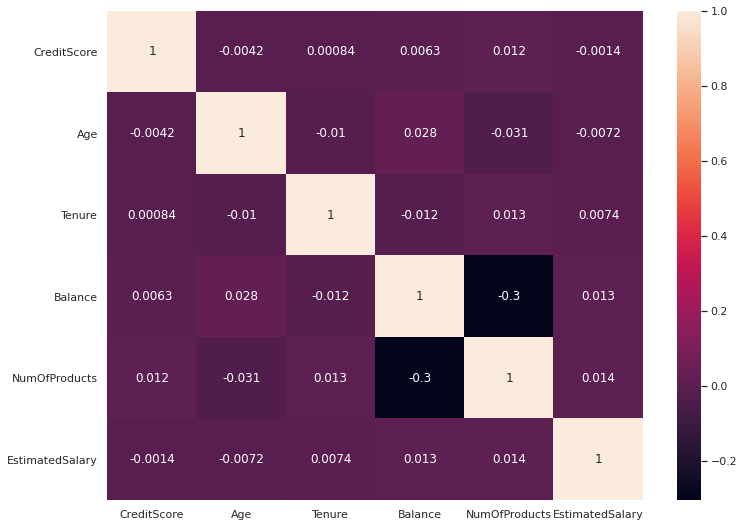

In [ ]:
corr = data.corr()
plt.figure(figsize = (12, 9))
sns.heatmap(corr, annot = True)
plt.show()

# Shows a negative relationship betw. NumOfProducts and Balance

## Method 3: Visualization

### A. Univariate Data

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0, 0.5, 'No of Customers')

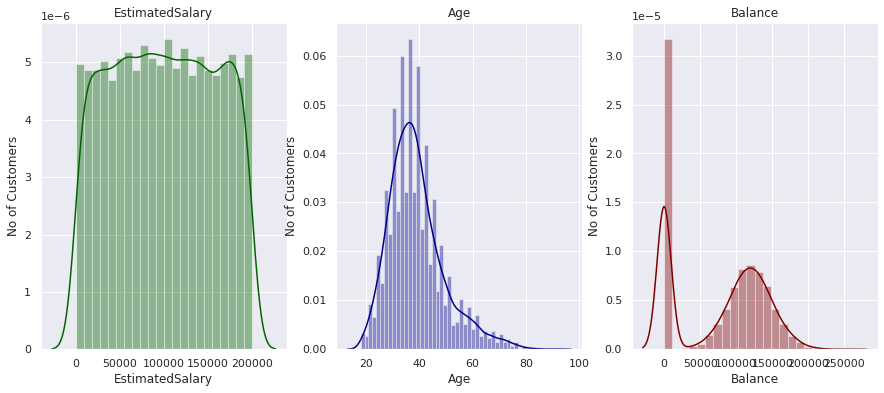

In [ ]:
f, axes = plt.subplots(ncols=3, figsize=(15, 6))

sns.distplot(data.EstimatedSalary, kde=True, color="darkgreen", ax=axes[0]).set_title('EstimatedSalary')
axes[0].set_ylabel('No of Customers')


sns.distplot(data.Age, kde=True, color="darkblue", ax=axes[1]).set_title('Age')
axes[1].set_ylabel('No of Customers')


sns.distplot(data.Balance, kde=True, color="maroon", ax=axes[2]).set_title('Balance')
axes[2].set_ylabel('No of Customers')

# EstimatedSalary: a plateau
# Age: a normal distribution
# Balance: a bimodal distritution

### B.Bivariate Data

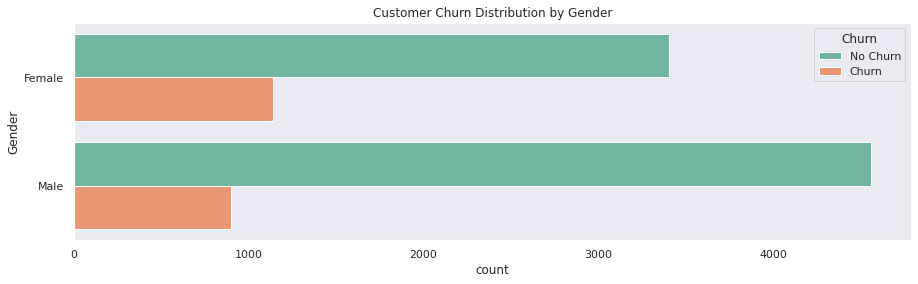

In [ ]:
plt.figure(figsize=(15,4))
p=sns.countplot(y="Gender", hue='Churn', data=data,palette="Set2")
legend = p.get_legend()
legend_txt = legend.texts
legend_txt[0].set_text("No Churn")
legend_txt[1].set_text("Churn")
p.set_title('Customer Churn Distribution by Gender')

ax = plt.gca()
ax.grid(False)

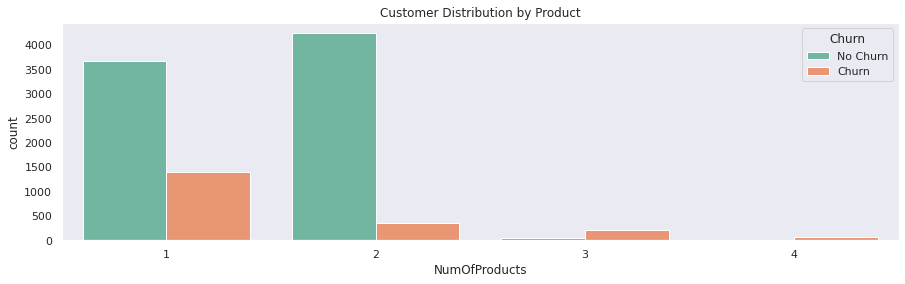

In [ ]:
plt.figure(figsize=(15,4))
p=sns.countplot(x='NumOfProducts', hue='Churn',data=data, palette="Set2")
legend = p.get_legend()
legend_txt = legend.texts
legend_txt[0].set_text("No Churn")
legend_txt[1].set_text("Churn")
p.set_title('Customer Distribution by Product')

ax = plt.gca()
ax.grid(False)

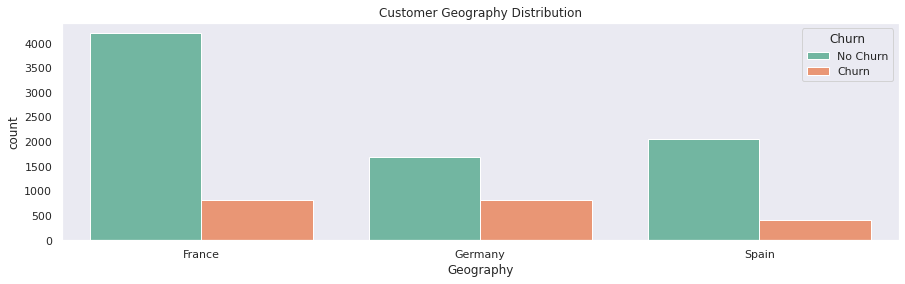

In [ ]:
plt.figure(figsize=(15,4))
p=sns.countplot(x='Geography', hue='Churn',data=data, palette="Set2")
legend = p.get_legend()
legend_txt = legend.texts
legend_txt[0].set_text("No Churn")
legend_txt[1].set_text("Churn")
p.set_title('Customer Geography Distribution')

ax = plt.gca()
ax.grid(False)

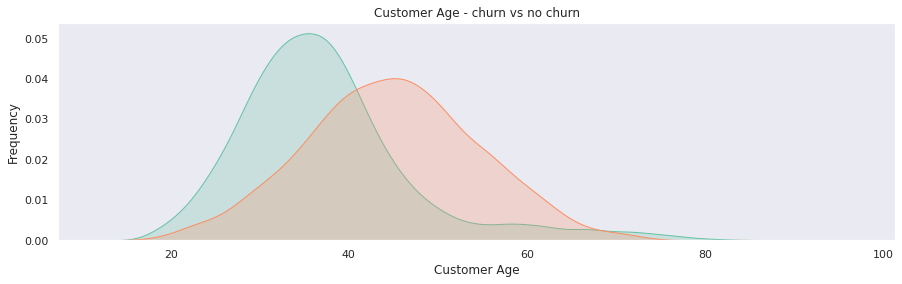

In [ ]:
plt.figure(figsize=(15,4))
ax=sns.kdeplot(data.loc[(data['Churn'] == 0),'Age'] , color=sns.color_palette("Set2")[0],shade=True,label='no churn')
ax=sns.kdeplot(data.loc[(data['Churn'] == 1),'Age'] , color=sns.color_palette("Set2")[1],shade=True, label='churn')
ax.set(xlabel='Customer Age', ylabel='Frequency')
plt.title('Customer Age - churn vs no churn')

ax = plt.gca()
ax.grid(False)

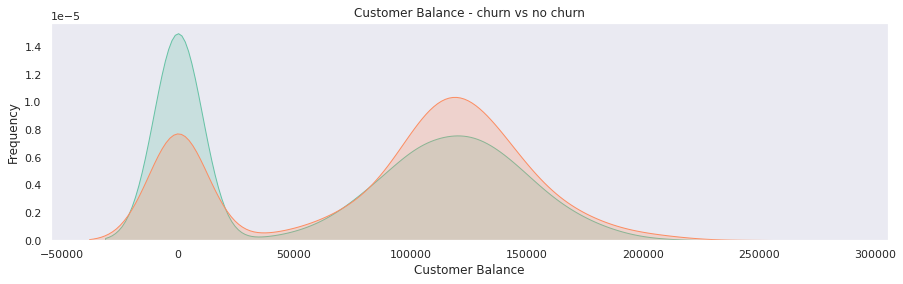

In [ ]:
plt.figure(figsize=(15,4))
ax=sns.kdeplot(data.loc[(data['Churn'] == 0),'Balance'] , color=sns.color_palette("Set2")[0],shade=True,label='no churn')
ax=sns.kdeplot(data.loc[(data['Churn'] == 1),'Balance'] , color=sns.color_palette("Set2")[1],shade=True, label='churn')
ax.set(xlabel='Customer Balance', ylabel='Frequency')
plt.title('Customer Balance - churn vs no churn')

ax = plt.gca()
ax.grid(False)

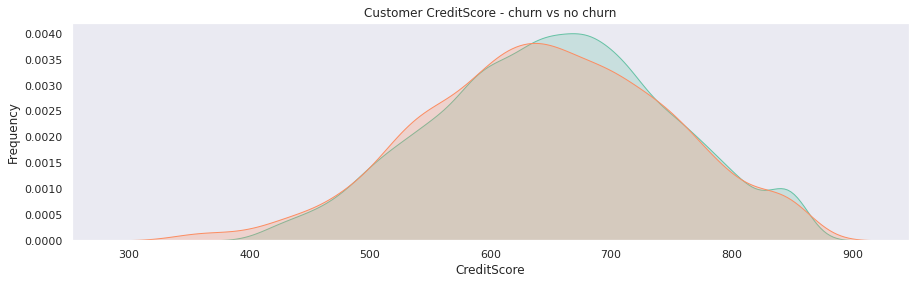

In [ ]:
plt.figure(figsize=(15,4))
ax=sns.kdeplot(data.loc[(data['Churn'] == 0),'CreditScore'] , color=sns.color_palette("Set2")[0],shade=True,label='no churn')
ax=sns.kdeplot(data.loc[(data['Churn'] == 1),'CreditScore'] , color=sns.color_palette("Set2")[1],shade=True, label='churn')
ax.set(xlabel='CreditScore', ylabel='Frequency')
plt.title('Customer CreditScore - churn vs no churn')

ax = plt.gca()
ax.grid(False)

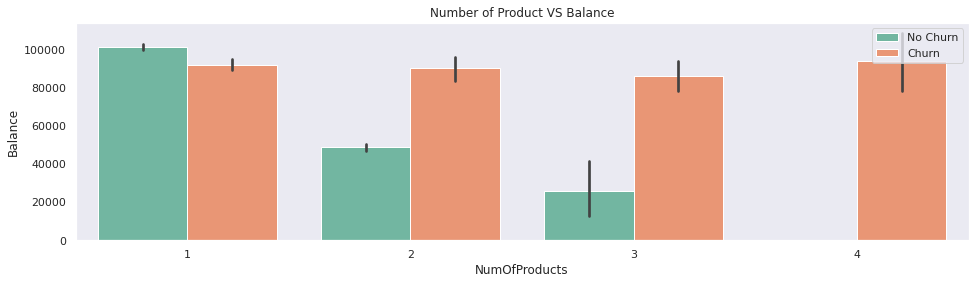

In [ ]:
plt.figure(figsize=(16,4))

p=sns.barplot(x='NumOfProducts',y='Balance',hue='Churn',data=data, palette="Set2")
p.legend(loc='upper right')
legend = p.get_legend()
legend_txt = legend.texts
legend_txt[0].set_text("No Churn")
legend_txt[1].set_text("Churn")
p.set_title('Number of Product VS Balance')

ax = plt.gca()
ax.grid(False)

# Feature Seleciton - Tree Based Selection

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

## Encoding the categorical variables

In [ ]:
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
#data['Geography'] = le.fit_transform(data['Geography'])
#data['Geography'].head(20)

0     0
1     2
2     0
3     0
4     2
5     2
6     0
7     1
8     0
9     0
10    0
11    2
12    0
13    0
14    2
15    1
16    1
17    2
18    2
19    0
Name: Geography, dtype: int64

In [ ]:
data.dtypes

CreditScore           int64
Geography          category
Gender             category
Age                 float64
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard          category
IsActiveMember     category
EstimatedSalary       int64
Churn              category
dtype: object

In [ ]:
# Encoding the categorical variables
data["Geography"] = data["Geography"].astype('category').cat.codes
data["Gender"] = data["Gender"].astype('category').cat.codes
data["HasCrCard"] = data["HasCrCard"].astype('category').cat.codes
data["Churn"] = data["Churn"].astype('category').cat.codes

In [ ]:
data.dtypes

CreditScore           int64
Geography              int8
Gender                 int8
Age                 float64
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard              int8
IsActiveMember     category
EstimatedSalary       int64
Churn                  int8
dtype: object

In [ ]:
data['Geography'].head(20)

0     0
1     2
2     0
3     0
4     2
5     2
6     0
7     1
8     0
9     0
10    0
11    2
12    0
13    0
14    2
15    1
16    1
17    2
18    2
19    0
Name: Geography, dtype: int8

In [ ]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,619,0,0,42.0,2,0.00,1,1,1,101348,1
1,608,2,0,41.0,1,83807.86,1,0,1,112542,0
2,502,0,0,42.0,8,159660.80,3,1,0,113931,1
3,699,0,0,39.0,1,0.00,2,0,0,93826,0
4,850,2,0,43.0,2,125510.82,1,1,1,79084,0


## Splitting the Dataset into Training and Test

In [ ]:
X = data.drop('Churn', axis = 1)
y = data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)

In [ ]:
forest=RandomForestClassifier(n_estimators=500,random_state=1)

forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
importances=forest.feature_importances_

In [ ]:
features = data.drop(['Churn'],axis=1).columns

indices = np.argsort(importances)[::-1]

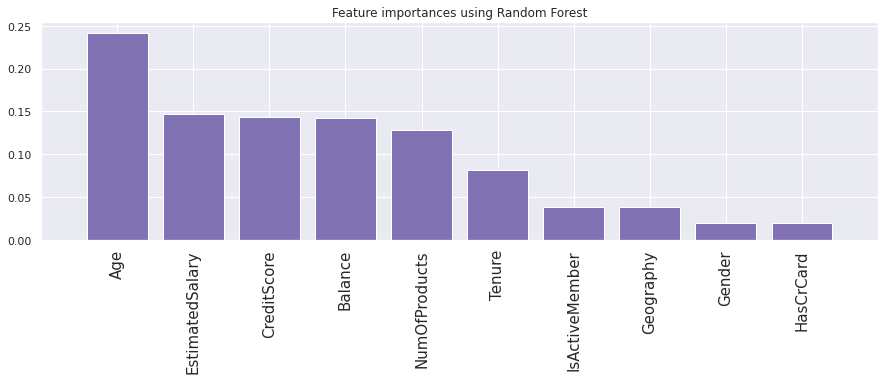

In [ ]:
plt.figure(figsize=(15,4))
plt.title("Feature importances using Random Forest")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="m",  align="center")
plt.xticks(range(X_train.shape[1]), features[indices], rotation='vertical',fontsize=15)
plt.xlim([-1, X_train.shape[1]])
plt.show()



# Apply Logistic Regression Model by Statsmodel and Select Top 5 Features

In [ ]:
import statsmodels.api as sm
top5_features = ['Age','EstimatedSalary','CreditScore','Balance','NumOfProducts']
logReg = sm.Logit(y_train, X_train[top5_features])
logistic_regression = logReg.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Optimization terminated successfully.
         Current function value: 0.472882
         Iterations 6


## Calculate the Coefficients

In [ ]:
logistic_regression.summary

<bound method BinaryResults.summary of <statsmodels.discrete.discrete_model.LogitResults object at 0x7f1e252eb250>>

In [ ]:
logistic_regression.params

Age                0.048335
EstimatedSalary   -0.000001
CreditScore       -0.004470
Balance            0.000003
NumOfProducts     -0.361678
dtype: float64

In [ ]:
# Create function to compute coefficients
coef = logistic_regression.params
def y (coef,Age,EstimatedSalary,CreditScore,Balance,NumOfProducts) : 
    return coef[0]*Age+ coef[1]*EstimatedSalary+coef[2]*CreditScore+coef[1]*Balance+coef[2]*NumOfProducts

In [ ]:
import numpy as np

#A customer having below attributes
#Age: 50
#EstimatedSalary: 100,000 
#CreditScore: 600
#Balance: 100,000
#NumOfProducts: 2
#would have 38% chance of churn

y1 = y(coef, 50, 100000, 600,100000,2)
p = np.exp(y1) / (1+np.exp(y1))
p

0.3823018385467385

# Apply Logistic regression Model using scikit-learn

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs').fit(X_train[top5_features], y_train)
clf.predict(X_test[top5_features])
clf.predict_proba(X_test[top5_features])

array([[0.61565043, 0.38434957],
       [0.76717174, 0.23282826],
       [0.78137396, 0.21862604],
       ...,
       [0.55254816, 0.44745184],
       [0.85311951, 0.14688049],
       [0.75851726, 0.24148274]])

## Calculate the Accuracy

In [ ]:
clf.score(X_test[top5_features], y_test)

0.79